# Oefenzitting 3

## 1. Interpreteren van code

### Oefening 1.1

In [2]:
i = []
j = 10
n = 0

while len(i) != j:
    i.append([1,2])
    n += 2

print(i)
print(j)
print(n)

[[1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
10
20


### Oefening 1.2

In [4]:
n = 6
k = {'a':5, 'b':9, 'c':2, 'd':67}
a = 9
for n in k:
    if k[n] < a:
        print (n)
    else :
        print ("groter")

a
groter
c
groter


## 2. Probleemoplossend denken

### Oefening 2.1

In [22]:
import random

bord = []

# Maak een leeg bord
for rij in range(10):
    bord.append(['']*10)

KORT = "."
LANG = ":"
STENEN = "#"

for rij in range(10):

    for kolom in range(10):

        # 1 op 4 kans dat het stenen zijn
        if random.randint(1,4) == 1:

            bord[rij][kolom] = STENEN

        elif 0 < rij < 9 and 0 < kolom < 9:
        
            if (bord[rij-1][kolom] == LANG or bord[rij+1][kolom] == LANG or bord[rij][kolom-1] == LANG or bord[rij][kolom+1] == LANG) and random.randint(1,2) == 1:

                bord[rij][kolom] = LANG

            elif (bord[rij-1][kolom] != LANG or bord[rij+1][kolom] != LANG or bord[rij][kolom-1] != LANG or bord[rij][kolom+1] != LANG) and random.randint(1,4) == 1:

                bord[rij][kolom] = LANG

            else:

                bord[rij][kolom] = KORT

        else:

            bord[rij][kolom] = KORT


# Print het bord
for rij in range(len(bord)):

    for kolom in range(len(bord)):

        print(bord[rij][kolom], end="")

    print("")

....##.#.#
.::..#:...
.::..:#..#
#...#::.#.
#...:.:...
.::.:.###.
.::..::::.
#:::.:#:..
.::.##.:..
..#....#..


### Oefening 2.2

In [32]:
set1 = {1,2,3,4,5}
set2 = {3,5,6,8}
set3 = {0,4,5,2,8}

# 1: unie min de doorsnede
nieuweSet1 = (set1 | set2) - (set1 & set2)
print(nieuweSet1)

#2: waarden die in precies één van de drie sets voorkomen
nieuweSet2 = (set1 | set2 | set3) - ((set1 & set2) | (set2&set3) | (set1 & set3))
print(nieuweSet2)

#3: waarden die exact in twee sets voorkomen
((set1&set2) | (set2&set3) | (set1&set3)) - (set1&set2&set2)

{1, 2, 4, 6, 8}
{0, 1, 6}


{2, 4, 8}

### Oefening 2.3

Een __multiset__ is een collectie waarin elk item met een bepaalde
frequentie voorkomt. Je kan bijvoorbeeld een multiset hebben met 4 bananen en
3 appels. Een multiset kan geïmplementeerd worden als een dictionary met de items als sleutels en de frequenties als waarden.

_Merk op dat een multiset geen negatief aantal items kan bevatten, en dat
entries met frequentie 0 weinig betekenis hebben._

In [48]:
set1 = {'appel':3, 'banaan':4}
set2 = {'peer':2, 'banaan': 5}


def unie(set1, set2):
    '''
    We bepalen de unie van twee multisets, die als values strings hebben en als keys integers.

    PARAMETERS
    ----------
    set1 = de eerste multiset (dictionary)
    set2 = de tweede multiset (dictionary)

    RETURNS
    -------
    dictionary
    '''

    unie = dict()

    # We loopen over de keys in set1
    for key in set1:

        # De key bestaat ook in set2
        if key in set2.keys():

            # We tellen de values op en voegen die toe aan de unie
            unie[key] = set1[key] + set2[key]

        # De key bestaat niet in set2
        else:

            # De waarde voor de key is gewoon de value uit set1
            unie[key] = set1[key]

    # We loopen ook over de keys in set2
    for key in set2:

        # Als de key nog niet in de unie zit, zit hij per definitie niet in set1
        if key not in unie:

            # We zetten de value voor deze key op de overeenkomstige value van set2
            unie[key] = set2[key]

    return unie


def doorsnede(set1, set2):
    '''
    We bepalen de doorsnede van twee multisets, die als values strings hebben en als keys integers.

    PARAMETERS
    ----------
    set1 = de eerste multiset (dictionary)
    set2 = de tweede multiset (dictionary)

    RETURNS
    -------
    dictionary
    '''

    doorsnede = dict()

    # We loopen over de keys in set1
    for key in set1:

        # De key bestaat ook in set2
        if key in set2.keys():

            # We tellen de values op en voegen die toe aan de doorsnede
            doorsnede[key] = set1[key] + set2[key]

    return doorsnede


def verschil(set1, set2):
    '''
    We bepalen het verschil van twee multisets, die als values strings hebben en als keys integers.

    PARAMETERS
    ----------
    set1 = de eerste multiset (dictionary)
    set2 = de tweede multiset (dictionary)

    RETURNS
    -------
    dictionary
    '''

    verschil = dict()

    # We loopen over de keys in set1
    for key in set1:

        # De key bestaat ook in set2
        if key in set2.keys():

            if set1[key] - set2[key] > 0:

                verschil[key] = set1[key] - set2[key]

        # De key bestaat niet in set2
        else:

            # De waarde voor de key is gewoon de value uit set1
            verschil[key] = set1[key]

    return verschil


print("UNIE: \t\t", unie(set1,set2))
print("DOORSNEDE: \t", doorsnede(set1,set2))
print("VERSCHIL1: \t", verschil(set1,set2))
print("VERSCHIL2: \t", verschil(set2,set1))

UNIE: 		 {'appel': 3, 'banaan': 9, 'peer': 2}
DOORSNEDE: 	 {'banaan': 9}
VERSCHIL1: 	 {'appel': 3}
VERSCHIL2: 	 {'peer': 2, 'banaan': 1}


## 3. UOVT

### Oefening 3.1

In [60]:
getallen = list()

symbool = input("Geef het te gebruiken symbool: ")
schaal = int(input("Hoe lang moet het langste blokje zijn? "))
userInput = input("Geef een positief getal: ")

while userInput.isdigit():

    getallen.append(int(userInput))
    userInput = input("Geef een positief getal: ")

grootste = max(getallen)

for getal in getallen:
    print(symbool * round((getal/grootste) * schaal))

??????????????
?????????????????????????????????????????????
????????????????????????????????????
??????????????????
?????????
??????????????????????????????????????????????????
??????????????????
????????????????????????????????


### Oefening 3.2

In [77]:
scoreAantallen = {
    "A": 8,
    "B": 13,
    "D": 3,
    "F": 2,
    "C": 6
}

# 1 - print alle sleutels
print("KEYS")
for key in scoreAantallen: print(key, end=" ")

# 2 - print alle waardes
print("\n\nVALUES")
for value in scoreAantallen.values(): print(value, end=" ")

# 3 - print alle key-value pairs
print("\n\nKEY-VALUE PAIRS")
for (key,value) in scoreAantallen.items(): print(f'{key}:{value}', end=" ")

# 4 - print alle key-value pairs in alfabetische volgorde
print("\n\nKEY-VALUE PAIRS (ALFABETISCH)")
for (key,value) in sorted(scoreAantallen.items()): print(f'{key}:{value}', end=" ")

# 4 - print sterretjes obv de value in alfabetische volgorde
print("\n\nSTERRETJES OBV VALUES (ALFABETISCH)")
for (key,value) in sorted(scoreAantallen.items()): print(key + ": " + "*"*value)

KEYS
A B D F C 

VALUES
8 13 3 2 6 

KEY-VALUE PAIRS
A:8 B:13 D:3 F:2 C:6 

KEY-VALUE PAIRS (ALFABETISCH)
A:8 B:13 C:6 D:3 F:2 

STERRETJES OBV VALUES (ALFABETISCH)
A: ********
B: *************
C: ******
D: ***
F: **


### Oefening 3.3

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

picture = mpimg.imread("foto.jpg")

print(picture)
plt.imshow(picture)

### Oefening 3.4

pi werd berekend to op een precisie van 1e-05: 3.1415929203539825


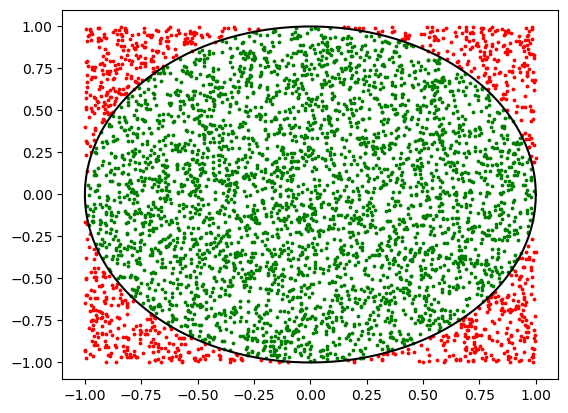

In [100]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

# Vraag de precisie aan de gebruiker (geef een niet te klein getal in).
gevraagde_precisie = max(0.000001,float(input("Geef de gewenste precisie in: ")))

# initialiseer de nodige variabelen:
pi_geschat = 0
aantalBinnenCirkel = 0
totaal = 0

xWaardenGoed = []
xWaardenSlecht = []
yWaardenGoed = []
yWaardenSlecht = []

while abs(math.pi-pi_geschat) > gevraagde_precisie :

    totaal +=1
    
    # de random functie geeft een willekeurig getal terug tussen [0,1]
    x = (random.random() * 2) - 1
    y = (random.random() * 2) - 1
    
    # bereken de straal van de pool-coordinaten
    r = math.sqrt(x**2+y**2)
    
    # indien het gegenereerde punt binnen de cirkel valt pas je bepaalde variabelen aan
    if abs(r) <= 1 :
        aantalBinnenCirkel+=1
        xWaardenGoed.append(x)
        yWaardenGoed.append(y)
    else:
        xWaardenSlecht.append(x)
        yWaardenSlecht.append(y)

    pi_geschat = (aantalBinnenCirkel/totaal) * 4
    
print(f"pi werd berekend to op een precisie van {gevraagde_precisie}: {pi_geschat}")

theta = np.linspace( 0 , 2 * np.pi , 150 )
a = np.cos( theta )
b = np.sin( theta )

plt.figure()
plt.scatter(xWaardenGoed, yWaardenGoed, s=3, c="g")
plt.scatter(xWaardenSlecht, yWaardenSlecht, s=3, c="r")
plt.plot(a,b, "k")
plt.xlim((-1.1,1.1))
plt.ylim((-1.1,1.1))
plt.show()